## 0. Importing Modules

In [1]:
##### some basic modules
import os
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

##### Image-related modules
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
import cv2 

##### keras module
from keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam


Using TensorFlow backend.


In [2]:
##### Import custom function

from unet_model import model
from data_preprocessing import rgb_lab_transformation, feature_label_generation, data_generation
from visualization import visualize_validation_image

## 1. Uploading and Preprocessing Dataset

##### Uploading

In [3]:
size_row = 128
size_col = 128

dir_name = '..' # name of directory where image data is located

In [4]:
train_image, test_image, train_label, test_label = data_generation(dir_name = dir_name,
                                                                   image_size = (size_row, size_col),
                                                                   single_character = 'melon-chan') 
                                                                   # for training only one character, need to specify the character name

1/1


In [5]:
train_feature = train_image.reshape(train_image.shape[0], size_row, size_col, 1) 
test_feature = test_image.reshape(test_image.shape[0], size_row, size_col, 1)

x_feature = np.concatenate([train_feature, test_feature])
x_label = np.concatenate([train_label, test_label])

## 2. Defining and Fitting the Model

##### Define the model

In [6]:
input_shape = (size_row,size_col,1)
kernel_size = 4

In [7]:
K.clear_session()

In [8]:
model = model(image_size = input_shape[:2], kernel_size = kernel_size, optimizer = Adam(0.0002, 0.5))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 4)  40          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 4)  148         conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 64, 64, 4)    0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

##### Fitting

In [10]:
image_valid = plt.imread('directory') # insert name of directory where validation image is located
image_valid = cv2.resize(image_valid, (size_row, size_col))

img_gray = rgb2gray(image_valid).reshape(128, 128, 1)
img_gray3 = np.concatenate([img_gray]*3, axis = 2) # concatenating three gray images so that it can have 3 channels
img_lab3 = rgb2lab(img_gray3) # convert concatenated image to lab

In [11]:
model_loss = []
img_colorized = []

In [12]:
epochs = 100
save_interval = int(epochs/20) # later, going to visualize training process with 20 images  

In [13]:
for i in range(epochs):

    model_hist = model.fit(x=x_feature, 
                           y=x_label, 
                           batch_size= 1, 
                           epochs=1,
                           verbose = 0)
    
    model_loss.append(model_hist.history['loss'])
    
    if i % save_interval == 0:
        
        print(i, model_hist.history['loss'])
        
        valid_input = img_lab3[:,:,0].reshape(1, size_row, size_col, 1)/128
        
        pred = model.predict(valid_input)    
        pred = pred.reshape(size_row, size_col, 2)
        
        cur_pred = np.zeros((size_row, size_col, 3))             
        # Output colorizations
        cur_pred[:,:,0] = valid_input.reshape(size_row, size_col) * 128 # lab class
        cur_pred[:,:,1:] = pred*128 # lab predicted
        
        img_colorized.append(lab2rgb(cur_pred))        

0 [0.034675848033900065]


/home/dabsdamoon/anaconda3/envs/tensorflow/lib/python3.6/site-packages/skimage/color/colorconv.py:993: UserWarning: Color data out of range: Z < 0 in 5 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


5 [0.025990546950035626]
10 [0.0234923732932657]
15 [0.018927988979137608]


/home/dabsdamoon/anaconda3/envs/tensorflow/lib/python3.6/site-packages/skimage/color/colorconv.py:993: UserWarning: Color data out of range: Z < 0 in 1 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


20 [0.013617757265456021]


/home/dabsdamoon/anaconda3/envs/tensorflow/lib/python3.6/site-packages/skimage/color/colorconv.py:993: UserWarning: Color data out of range: Z < 0 in 10 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


25 [0.010708702663477097]
30 [0.009163341957092699]
35 [0.008315635879989713]
40 [0.007360790021872769]
45 [0.0066533719499905905]
50 [0.006057361275371578]
55 [0.0056802491140034465]
60 [0.005324784159246418]
65 [0.005195822563513907]
70 [0.004937381127900962]
75 [0.004543563678291522]
80 [0.0043504678708915084]
85 [0.00415862772691374]
90 [0.004173794406233356]
95 [0.0038766763334731674]


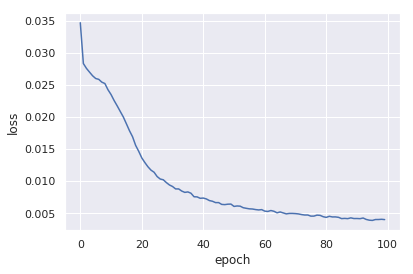

In [14]:
##### Plot loss function

plt.plot(model_loss)
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

##### Visualization

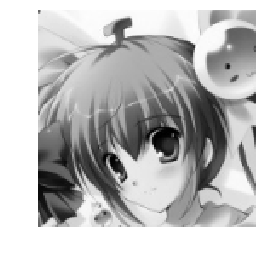

In [15]:
input_val = img_gray.copy()
plt.imshow(input_val.reshape(size_row, size_col), cmap = 'gray')
plt.axis('off')
plt.show()

In [16]:
grid_row = 4
grid_col = 5

In [17]:
g_row = []
i = 0

for r in range(grid_row):
    
    g_column = []
    
    for c in range(grid_col):
        g_column.append(img_colorized[i])
        i += 1
        
    g_column = np.concatenate(g_column, axis = 1)
    g_row.append(g_column)

g_row = np.concatenate(g_row)

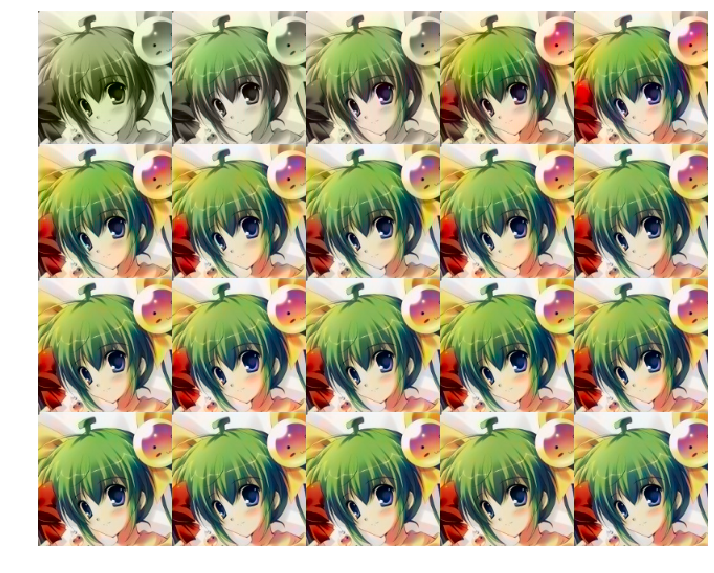

In [18]:
plt.figure(figsize = (12,12))
plt.axis('off')
plt.imshow(g_row)

##### Test with different image (same character)

/home/dabsdamoon/anaconda3/envs/tensorflow/lib/python3.6/site-packages/skimage/color/colorconv.py:993: UserWarning: Color data out of range: Z < 0 in 27 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


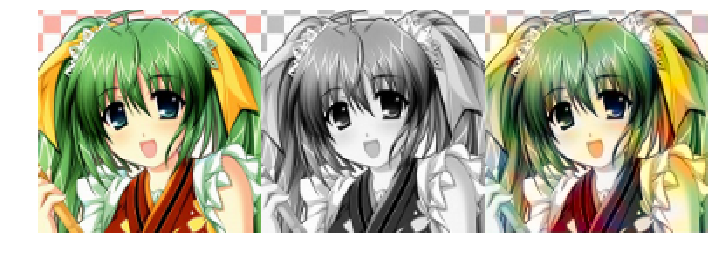

In [20]:
image_valid = plt.imread('directory') # insert name of directory where validation image is located
visualize_validation_image(image_valid, model, image_size = (size_row, size_col))

##### Test with Different Character

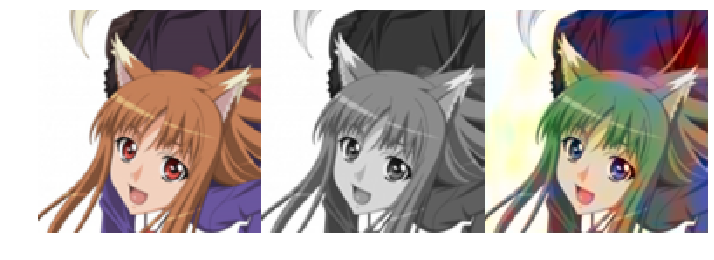

In [21]:
image_valid = plt.imread('directory') # insert name of directory where validation image is located
visualize_validation_image(image_valid, model, image_size = (size_row, size_col))